# Gradient Descent

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.



[link text](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

In [1]:
LINK = 'https://storage.googleapis.com/kagglesdsdata/datasets%2F10624%2F14867%2FSalary_Data.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598857796&Signature=S%2B8NLy124DJpxtQ6WbZuzv%2BDfKX0vGovmgNyJwJAkUTCoTQjiKTFn7jyUaB2t%2FD7loL2j%2BaFEkxN0rOEFJb8wR3qnnfV1Vy1QlY%2FTwQNLF04j089FkbjUaNZZ6bPTTlZ9CYy7oirATBcDojrCI5PH741lUjPbMPol9fNE9GFUWU%2Fz5u10LM0zsPS8k1uKx%2BvHX2eLyR9h2X%2BKvS8BYDOvb6q2hKwja0opk4QRFjM%2BcnReDWkR%2B9y%2FhMiH6xcmeuP7nkxY%2BzkALVj0dHszdCYzjFaZlMhUEIYiUJ7zLzKQxE%2FtqAnhzjybqTjSaADA85I70Y0pVI%2BUSzIIu8cu01Vtg%3D%3D'
OUT_FILE = 'sample.csv'

!curl LINK --output f'/content/{OUT_FILE}' --silent

In [2]:
!ls -lrtah

total 16K
drwxr-xr-x 1 root root 4.0K Aug 24 16:35 .
drwxr-xr-x 1 root root 4.0K Aug 24 16:35 sample_data
drwxr-xr-x 1 root root 4.0K Aug 26 16:14 .config
drwxr-xr-x 1 root root 4.0K Aug 28 07:06 ..


In [3]:
!pwd

/content


In [4]:
import pandas as pd
import numpy as np

import plotly.express as px

In [5]:
from sklearn.datasets import make_regression

In [6]:
# generate regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=15, bias=3, random_state=25)

In [7]:
X = X.reshape(-1)
X, y


(array([-6.42860602e-02, -2.86708363e-01,  5.60169466e-01,  2.88464396e-01,
        -4.65343008e-01,  3.22939097e-02,  2.49684695e+00, -6.69187288e-01,
        -1.04601802e+00,  1.94704541e-01, -2.36963331e-01,  1.92565548e+00,
         9.70627927e-01,  9.36555369e-01,  8.53834922e-02,  1.36675560e+00,
         2.76935398e-01,  1.17826259e+00,  4.74867350e-01,  4.56448266e-01,
        -8.39584849e-01, -6.26751086e-02, -9.89426214e-01,  8.95528985e-01,
         1.10522616e-01, -2.64962455e-01,  2.06180819e+00, -5.91644030e-01,
        -9.78868170e-01,  1.39026747e+00,  3.50955946e-01, -7.42710733e-01,
        -2.50444548e+00, -2.06594183e+00,  1.02689030e+00,  1.68878477e+00,
        -1.40047148e+00, -5.14054397e-01, -1.11071613e+00, -1.08273834e+00,
         8.68583052e-01,  1.37270028e+00, -6.27453481e-01, -3.11325251e-01,
        -6.29536647e-02,  2.59248158e-01, -8.92669950e-01, -5.28534707e-01,
         1.54469194e+00,  1.11363811e+00,  1.18998786e+00,  3.88291936e-01,
        -3.2

In [8]:
px.scatter(x=X, y=y)

In [9]:
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



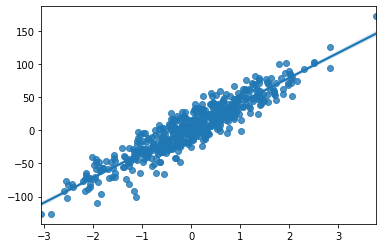

In [10]:
sb.regplot(x=X, y=y)

In [11]:
#y = mx + b

In [12]:
#error = (y_hat - y) ^ 2

In [13]:
def gradient_descent(X, y, m, b, lr):
  n = len(X)
  m_deriv = 0
  b_deriv = 0
  y_preds = []
  total_error = 0
  
  for xi, yi in zip(X, y):
    y_hat = m * xi + b
    error = np.power((y_hat - yi), 2)

    y_preds.append(y_hat)
    total_error += error
    mse = total_error / n

    # Calculate partial derivatives
    # -2x(y - (mx + b))
    m_deriv += -2 * xi * (yi - y_hat)

    # -2(y - (mx + b))
    b_deriv += -2 * (yi - y_hat)
  
  m -= (1 / n) * m_deriv * lr
  b -= (1 / n) * b_deriv * lr

  return m, b, y_preds, total_error, mse

In [14]:
# Iteration1
m = np.random.randint(10)
b = np.random.randint(5)
lr = 0.1
total_error = 0
mse = 0
mse_list = []
print('Slope m:{}; Bias b:{}; Total Error:{}; MSE:{}'.format(m, b, total_error, mse))
fig = px.scatter(x=X, y=y)

for iter in range(20):
  m, b, y_preds, total_error, mse = gradient_descent(X, y, m, b, lr)
  print('Iteration#{} -> Slope m:{}; Bias b:{}; Total Error:{}, MSE:{}'.format(iter, m, b, total_error, mse))
  mse_list.append(mse)
  fig.add_scatter(x=X, y=y_preds, mode='lines')

fig.show()

Slope m:7; Bias b:3; Total Error:0; MSE:0
Iteration#0 -> Slope m:13.78374264878806; Bias b:3.1092238539780226; Total Error:645611.0603180653, MSE:1291.2221206361307
Iteration#1 -> Slope m:19.066423650359738; Bias b:3.201234029000025; Total Error:440917.3295893427, MSE:881.8346591786853
Iteration#2 -> Slope m:23.180192732827003; Bias b:3.278448523524881; Total Error:316782.28275776247, MSE:633.5645655155249
Iteration#3 -> Slope m:26.38370173200436; Bias b:3.3430284866513293; Total Error:241500.93043911492, MSE:483.0018608782298
Iteration#4 -> Slope m:28.878368350785372; Bias b:3.396879412812839; Total Error:195846.41760540011, MSE:391.69283521080024
Iteration#5 -> Slope m:30.821041003603288; Bias b:3.441663200396209; Total Error:168158.93328602324, MSE:336.31786657204646
Iteration#6 -> Slope m:32.33386113700861; Bias b:3.4788164446097607; Total Error:151367.53131494144, MSE:302.73506262988286
Iteration#7 -> Slope m:33.511943185348706; Bias b:3.509571804538058; Total Error:141184.0962586

In [19]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=mse_list, mode='markers'))
fig.add_trace(go.Line(y=mse_list))
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [16]:
# Best fit
fig = px.scatter(x=X, y=y)
fig.add_scatter(x=X, y=y_preds)